R² Score: 0.4525618491941591
RMSE: 1.6791799673256027

Next Day Predicted Close Price: 84.9


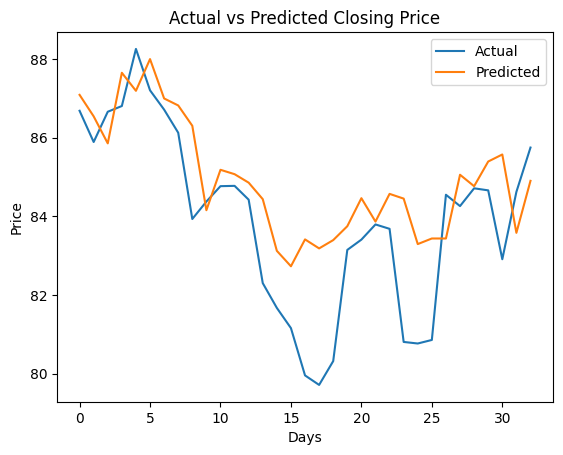

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("stock_prediction_example.csv", parse_dates=['Date']).dropna()

features = ["Open", "High", "Low", "Close", "Volume", "Return_1d", "MA_5", "MA_10"]
target = "Target_Next_Close"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

last_row = df[features].iloc[-1:]
next_pred = model.predict(last_row)[0]
print("\nNext Day Predicted Close Price:", round(next_pred, 2))

plt.plot(list(y_test.reset_index(drop=True)), label="Actual")
plt.plot(list(y_pred), label="Predicted")
plt.title("Actual vs Predicted Closing Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
